In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0,100)
np.random.seed(1)
random_array=(np.random.random(100)*2-1)*5
#np.random.random(100)生成100*1的大小在(0,1)之间的随机数矩阵
#random_array在(-5，5)
y = 2 * x + random_array
x=x.reshape(100,1)
y=y.reshape(100,1)
data=np.concatenate((x,y),axis=1)
plt.scatter(x,y)
plt.show()
train_x,test_x=train_test_split(x,train_size=0.8,random_state=5)

In [5]:
from sklearn.metrics import mean_squared_error
#print(mean_squarred_error(test_y,pred_y))

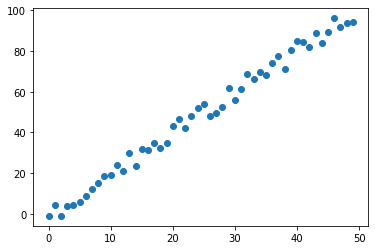

number is 0.  error is 82.951670
thema: [[1.60108882]]
number is 1.  error is 58.386900
thema: [[1.72970717]]
number is 2.  error is 27.070548
thema: [[1.9188638]]
number is 3.  error is 21.799831
thema: [[1.98955181]]
number is 4.  error is 22.293226
thema: [[2.0244328]]
number is 5.  error is 22.240700
thema: [[2.02325505]]
number is 6.  error is 21.712232
thema: [[1.99983516]]
number is 7.  error is 21.774383
thema: [[1.99108234]]
number is 8.  error is 23.733990
thema: [[1.95160001]]
number is 9.  error is 21.977957
thema: [[2.01623381]]
number is 10.  error is 21.715058
thema: [[1.99744869]]
number is 11.  error is 22.293933
thema: [[1.97410772]]
number is 12.  error is 22.053303
thema: [[2.01850211]]
number is 13.  error is 21.744325
thema: [[1.99337797]]
number is 14.  error is 22.331088
thema: [[1.97330575]]
number is 15.  error is 21.720410
thema: [[2.0022941]]
number is 16.  error is 21.723261
thema: [[2.00276524]]
number is 17.  error is 22.331274
thema: [[2.02525422]]
numbe

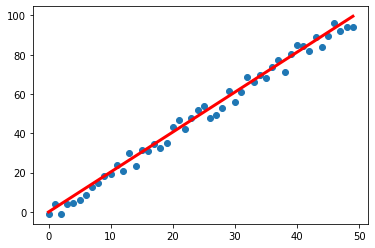

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#####   产生数据集   #####
x = np.arange(0,50)
np.random.seed(1)
#添加50个随机噪声,范围[-5,5]
random_array=(np.random.random(50)*2-1)*5
y = 2 * x + random_array

#转换二维数组
x=x.reshape(50,1)
y=y.reshape(50,1)
data=np.concatenate((x,y),axis=1)
plt.scatter(x,y)
plt.show()

def ML():
    ##### 机器学习模块调用 #####
    # 训练模型
    lr = LinearRegression()
    lr.fit(x, y)
    # 绘制数据散点图和拟合直线
    plt.scatter(x, y)
    plt.plot(x, lr.predict(x), color='red', linewidth=3)
    plt.show()

def SGD():
    NUM=1        #标记
    N = 1000     #最大循环次数
    epsilon = 190  #误差阈值
    theta = np.random.rand()  # 线性模型的系数
    learning_rate = 0.001        # 学习率
    #x = np.hstack([np.ones((50,1)),x])  # 增加全1列
    np.random.shuffle(data)
    #训练集与测试集
    train_data=data[:40]
    test_data=data[40:]

    #存放数据列表
    theta_list=[]
    loss_list=[]

    while True:
        np.random.shuffle(train_data)
        for n in range(N):
            #取随机样本
            randint = np.random.randint(0,40)
            temp_x = train_data[randint][0]
            temp_y = train_data[randint][1]
            #计算梯度
            grad = temp_x * (temp_x * theta - temp_y)
            theta = theta - learning_rate*grad
        x=train_data[:,0]
        y=train_data[:,1]
        loss=np.sum(0.5*(theta*x-y)**2)
        theta_list.append(theta)
        loss_list.append(loss)
        NUM=NUM+1
        print("num: %d ,theta: %s ,loss: %s "%(NUM,theta,loss))
        if loss<epsilon:
            break
    print(x)
    print(y)
    plt.scatter(x,y)
    plt.plot(x,x*theta,color='red',linewidth=3)
    plt.show()

def BGD():
    print(x)
    print(y)
    NUM = 1  # 标记
    N = 100  # 最大循环次数
    theta = np.random.rand()  # 线性模型的系数
    learning_rate = 0.001  # 学习率
    for i in range(N):
        pred_y = np.dot(x,theta)
        loss = pred_y - y
        # 计算梯度
        grad = np.dot(x.T,loss)/x.shape[0]
        # 更新theta
        theta = theta - learning_rate*grad
        sum_loss=np.sum(pred_y - y)
        NUM = NUM + 1
        # 输出当前的更新次数和误差
        print("num: %d ,theta: %s ,sum_loss: %s " % (NUM, theta, sum_loss))
    # 绘制拟合的曲线
    print(mean_squared_error(y,pred_y))
    plt.scatter(x,y)
    plt.plot(x,x*theta,color='green',linewidth=3)
    plt.show()

def MBGD():
    N = 200  # 最大循环次数
    theta = np.random.rand()  # 线性模型的系数
    learning_rate = 0.001  # 学习率
    epsilon = 20  # 误差阈值
    # 还原参数theta，其他参数复用梯度下降
    #theta = np.random.rand(2,1)
    # 指定每次更新使用的数据量
    batch_size = 20
    for i in range(N):
        # 随机样本的列索引
        indexs = np.random.randint(0, x.shape[0], size=batch_size)
        # 随机样本
        temp_x = x.take(indexs, axis=0)
        temp_y = y.take(indexs, axis=0)
        # 计算梯度
        grad = np.dot(temp_x.T, (np.dot(temp_x, theta) - temp_y)) / temp_x.shape[0]
        # 更新theta
        theta = theta - learning_rate * grad
        # 计算更新后的误差
        error = np.linalg.norm(np.dot(x, theta) - y)
        # 输出当前的更新次数和误差
        print("number is %d.  error is %f"%(i,error))
        # 误差小于阈值时退出循环
        print("thema: %s"%(theta))
        if error < epsilon:
            break
    print(temp_x)

    # 绘制拟合的曲线
    plt.scatter(x, y)
    plt.plot(x, np.dot(x, theta), color='red', linewidth=3)
    plt.show()

if __name__=="__main__":
    #SGD()
    #BGD()
    MBGD()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
x = np.arange(0,100)
np.random.seed(1)
random_array=(np.random.random(100)*2-1)*5
y = 2 * x + random_array
x=x.reshape(100,1)
y=y.reshape(100,1)
data=np.append(x,y,axis=1)
train,test=train_test_split(data,train_size=0.8,random_state=5)
train_x=train[:,0].reshape(80,1)
train_y=train[:,1].reshape(80,1)
test_x=test[:,0]
test_y=test[:,1]
plt.scatter(data[:,0],data[:,1])
plt.show()
def BGD():
    num=1000
    cnt=1
    theta=np.random.rand()
    learning_rate=0.001
    for i in range(num):
        pred_y=np.dot(x,theta)
        loss=pred_y-y
        grad=np.dot(x.T,loss)/x.shape[0]
        theta=theta-learning_rate*grad
        sum_loss=np.sum(pred_y-y)
        cnt+=1
        print(i,theta,sum_loss)
    return theta
        
BGD()